<a href="https://colab.research.google.com/github/dchaconoca/bc-data-science/blob/master/Introducci%C3%B3n_a_las_neuronas_artificiales%20Diana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a las neuronas artificiales

> **Rodolfo Ferro** <br>
> Google Dev Expert en ML, 2022.

## Contenidos

#### **Sección I**
1. **Bases:** Brief histórico
2. **Bases:** Un perceptrón
3. **Código:** Un perceptrón
4. **Bases:** Activación y bias

#### **Sección II**

5. **Bases:** Una red de neuronas
6. **Código:** Una red de neuronas
7. **Código:** Profundidad
8. **Código:** Visualización


9. **Cierre:** Sesión de preguntas y respuestas

## **Sección I**

### **Historia de las redes neuronales**

La historia de las redes neuronales se remontan a un tipo de neurona artificial, llamada **perceptrón**. Estos fueron desarrollados entre 1950 y 1960 por el científico **Frank Rosenblatt**.



### **Entonces, ¿qué es un perceptrón?**

Un perceptrón es una abstracción de una neurona real.

Éste toma varias **entradas** $x_1, x_2,..., x_n $ y produce una **salida**. Para la salida, Rosenblatt propuso que las entradas tuviesen **pesos** asciados $w_1, w_2, ..., w_n$, siendo estos números reales que expresan la importancia respectiva de cada entrada para la salida. La salida de la neurona, $0$ o $1$, está determinada con base en que la suma ponderada, 

$$\displaystyle\sum_{j}w_jx_j,$$

<!-- $\textbf{w}_{Layer}\cdot\textbf{x} = 
\begin{bmatrix}
w_{1, 1} & w_{1, 2} & \cdots & w_{1, n}\\
w_{2, 1} & w_{2, 2} & \cdots & w_{2, n}\\
\vdots & \vdots & \ddots & \vdots\\
w_{m, 1} & w_{m, 2} & \cdots & w_{m, n}\\
\end{bmatrix} \cdot
\begin{bmatrix}
x_1\\
x_2\\
\vdots\\
x_n
\end{bmatrix}$ -->

(para $j \in \{1, 2, ..., n\}$ ) sea menor o mayor que un **valor límite** que por ahora llamaremos umbral.

Resumiendo, un perceptron es un sistema que toma decisiones con base en la evidencia presentada.

#### **Hagamos un ejemplo**

In [1]:
import numpy as np


# Primero creamos nuestra clase perceptron
class Perceptron():
    def __init__(self, inputs, weights):
        # TODO
        self.inputs = np.array(inputs)
        self.weights = np.array(weights)
  
    def decide(self, treshold):
        return self.weights @ self.inputs  >= treshold

In [2]:
# Ahora necesitamos darle sus entradas y pesos asociados
inputs, weights = [], []

preguntas = [
    "· ¿Cuál es la velocidad? ",
    "· ¿Ritmo cardiaco? ",
    "· ¿Respiración? "
]

for pregunta in preguntas:
    i = int(input(pregunta))
    w = int(input("· Y su peso asociado es... "))
    inputs.append(i)
    weights.append(w)
    print()



· ¿Cuál es la velocidad? 1
· Y su peso asociado es... 1

· ¿Ritmo cardiaco? 1
· Y su peso asociado es... 1

· ¿Respiración? 1
· Y su peso asociado es... 1



In [3]:
treshold = int(input("· Y nuestro umbral/límite será: "))

· Y nuestro umbral/límite será: 5


In [4]:
p = Perceptron(inputs=inputs, weights=weights) # TODO Instantiate Perceptron
p.decide(treshold) # TODO Apply decision function with threshold

False

### **Bias y funciones de activación**

_Antes de seguir, introduciremos otro concepto, que es el **bias**._

La operación matemática que realiza la neurona se puede escribir como:

$$ f(\textbf{x}) = 
  \begin{cases}
    0 & \text{si $\displaystyle\sum_{j}w_jx_j <$ valor límite o treshold} \\
    1 & \text{si $\displaystyle\sum_{j}w_jx_j \geq$ valor límite o treshold} \\
  \end{cases},$$

donde $\textbf{x} = (x_1, x_2, ..., x_n)$ y $j \in \{1, 2, ..., n\}$.

De lo anterior, podemos despejar el valor límite (el umbral) y escribirlo como $b$, obteniendo:

$$ f(\textbf{x}) = 
  \begin{cases}
    0 & \text{si $\displaystyle\sum_{j}w_jx_j + b < 0$} \\
    1 & \text{si $\displaystyle\sum_{j}w_jx_j + b > 0$} \\
  \end{cases},$$

donde $\textbf{x} = (x_1, x_2, ..., x_n)$ y $j \in \{1, 2, ..., n\}$.

Esto que escribimos como $b$, también se le conoce como **bias**, y describe *qué tan susceptible la red es a __dispararse__*.

Curiosamente, esta descripción matemática encaja con la función de salto, que es una función de activación. Esto es, una función que permite el paso de información de acuerdo a la entrada y los pesos, permitiendo el disparo del lo procesado hacia la salida. La función de salto se ve como sigue:

<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/4/4a/Funci%C3%B3n_Cu_H.svg" width="40%" alt="Función escalón de Heaviside">
</center>

Sin embargo, podemos hacer a una neurona aún más susceptible con respecto a los datos de la misma (entradas, pesos, bias) añadiendo una función sigmoide. La función sigmoide se ve como a continuación: 

<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/6/66/Funci%C3%B3n_sigmoide_01.svg" width="40%" alt="Función sigmoide">
</center>

Esta función es suave, y por lo tanto tiene una diferente "sensibililad" a los cambios abruptos de valores. También, sus entradas en lugar de solo ser $1$'s o $0$'s, pueden ser valores en todos los números reales. La función sigmoide es descrita por la siguiente expresión matemática:

$$f(z) = \dfrac{1}{1+e^{-z}}$$

O escrito en términos de pesos y biases:

$$f(z) = \dfrac{1}{1+\exp{\left\{-\left(\displaystyle\sum_{j}w_jx_j +b\right)\right\}}}$$

#### **Volviendo al ejemplo**

In [ ]:
# Modificamos para añadir la función de activación
class SigmoidNeuron():
    def __init__(self, inputs, weights):
        self.inputs = np.array(inputs)
        self.weights = np.array(weights)
  
    def decide(self, bias):
        z = (self.weights @ self.inputs) - bias
        return (1. / (1. + np.exp(-z)))

In [ ]:
bias = int(input("· El nuevo bias será: "))
s = SigmoidNeuron(inputs, weights) # TODO Instantiate SigmoidNeuron
s.decide(bias)

· El nuevo bias será: 2


0.9525741268224334

> Esta es la neurona que usaremos para los siguientes tópicos.

<center>
    *********
</center>

## **Sección II**

### **Redes de neuronas artificiales**

Imaginemos que en lugar de una única neurona, tenemos 7 neuronas, todas con diferentes pesos (que inicialmente definiremos de manera aleatoria), dispuestas con la siguiente configuración: 
- Tenemos dos neuronas que representarán la información de entrada
- Cada una de las dos neuronas está conectada con cuatro siguientes neuronas dispuestas en una siguiente capa
- Finalmente, cada salida de las cuatro neuronas previas es conectada a una única neurona dispuesta en una capa de salida

La configuración quedaría como se muestra a continuación:

<center>
    <img src="https://www.pngitem.com/pimgs/m/531-5314899_artificial-neural-network-png-transparent-png.png" width="30%" alt="A simple neural network">
</center>

La previa configuración de neuronas dispuesta en forma de red podría tomar decisiones más complejas y abstractas, si consideramos la operación definida anteriormente (pesos, bias, función de activación) sobre los pesos de cada conexión de neuronas entre las capas.

Esto, a grandes rasgos, es una manera de abstraer una red neuronal artifical, compuesta por neuronas como previamente hemos definido; y donde se tienen capas de neuronas cuyas salidas funcionan como las entradas de otras neuronas (en las siguientes capas).

Con esto en mente, podemos programar una red neuronal artificial con la configuración predefinida.

In [32]:
import numpy as np
from numpy.random import uniform as u

# Funciones de activación
def sigmoide(z):
    return (1. / (1. + np.exp(-z)))

def tanh(z):
    return np.tanh(z)

def deriv_tanh(z):
    return (1 / (np.cosh(z) * np.cosh(z)))

In [51]:


class NeuralNet:
    """Objeto NeuralNet para crear redes neuronales artificiales.


    Por simplicidad, supondremos que la capa de entrada siempre será de
    dos neuronas y la capa de salida siempre de una, con el fin de poder
    visualizar el funcionamiento interno de la red como un mapeo
    $\mathbb{R}^2 \to \mathbb{R}$."""

    def __init__(self, n_layers=1, n_neurons=4):
        """Constructor de la clase.
        
        Inicializa pesos aleatorios en la red neuronal.
        
        Parámetros
        ----------
        n_capas : int
            Número de capas ocultas en la red. Por default, el valor
            es 1.
        n_neuronas : int
            Número de neuronas por capa en la red. Por default, el
            valor es 4.
        """

        # Definimos pesos y biases en la capa de entrada

        # TODO u [-1, 1]/[low, high] (2, n_neurons)/size
        # Los pesos son números aleatoreos entre -1 y 1 y
        # distribuidos de manera uniforme (función u)
        # w_in es una matriz de 2 filas (número de neuronas de entrada)
        # por n_neurons columnas (tantas columnas como neuronas en las 
        # capas ocultas)
        self.w_in = u(low=-1, high=1, size=(2, n_neurons)) 

        # TODO u [-1, 1] n_neurons
        # Los sesgos los definimos igual con números aleatoreos
        # pero es un vector del tamaño del número de neuronas
        self.b_in = u(low=-1, high=1, size=(n_neurons))

        # Definimos pesos y biases en las capas ocultas
        # TODO u [-3, 3] (n_layers, n_neurons, n_neurons)
        # TODO u [-1, 1] (n_layers, n_neurons)

        # Tensores (matrices de matrices) 
        self.w_hidden = u(low=-1, high=1, size=(n_layers, n_neurons, n_neurons)) 

        # Matriz n_layers x n_neurons
        self.b_hidden = u(low=-1.5, high=1.5, size=(n_layers, n_neurons))

        # Definimos pesos y biases en las capa de salida
        # Se trata de una sola neurona
        # TODO u [-1, 1] (n_neurons, 1)
        # TODO u [-1, 1] 1
        self.w_out = u(low=-1, high=1, size=(n_neurons, 1))
        self.b_out = u(low=-1, high=1, size=(1))

    @staticmethod
    def activate_layer_par(y_in, w, b):
        """Calcula el producto interno y aplica función de activación
        por capa.
        
        Parámetros
        ----------
        y_in : ndarray
            El vector con datos de entrada.
        w : ndarray
            El vector de pesos.
        b : ndarray
            El vector de biases.
        
        Retorna
        -------
        s : ndarray
            Un vector de activación reultante.
        """

        # TODO y_in · w + b
        # Utilizamos np.dot() que equivale al @ de más arriba
        # dot hace la multiplicación de 2 vectores
        z = np.dot(y_in, w)  + b 
        s = deriv_tanh(z) 
        
        return s

    @staticmethod
    def activate_layer_impar(y_in, w, b):
        z = np.dot(y_in, w)  + b 
        s = tanh(z) 
        
        return s

    def feedforward(self, y_in):
        """Calcula el producto interno y aplica función de activación
        por capa.
        
        Parámetros
        ----------
        y_in : ndarray
            El vector con datos de entrada.
        w : ndarray
            El vector de pesos.
        b : ndarray
            El vector de biases.
        
        Retorna
        -------
        s : ndarray
            Un vector de activación reultante."""

        # TODO Apply self.activate -> (y_in, self.w_in, self.b_in)
        # Activamos la primera capa con la función de activación y los 
        # parámetros de entrada
        y = self.activate_layer_impar(y_in, self.w_in, self.b_in) 

        # Activamos cada capa. Los datos de la capa i son los de la capa i-1
        # o sea y, luego w_hidden y b_hidden son vectores y utilizamos el 
        # que corresponda a la capa i
        for i in range(self.w_hidden.shape[0]):  # Número de capas ocultas
            # TODO Apply self.activate -> (y, self.w_hidden[i], self.b_hidden[i])
            if i % 2 == 0:
              y = self.activate_layer_par(y, self.w_hidden[i], self.b_hidden[i]) 
            else:
              y = self.activate_layer_impar(y, self.w_hidden[i], self.b_hidden[i]) 
        
        # TODO Apply self.activate -> (y, self.w_out, self.b_out)
        # Al finalizar las capas ocultas, activamos la neurona de salida
        output = self.activate_layer_par(y, self.w_out, self.b_out) 
        
        return output
    
    def visualize(self, grid_size=50, colormap='viridis', c_reverse=False):
        """Función para visualizar el mapeo de la red neuronal en un 
        plano 2D.
        
        Parámetros
        ----------
        grid_size : int
            El tamaño a utlizar para crear rejilla. La rejilla se crea de 
            tamaño (grid_size, grid_size). El valor default es 50.
        colormap : str
            El mapa de color a utilizar. El valor default es 'viridis'.
        c_reverse : bool
            Flag para especificar si se invierte el mapa de color. El valor
            default es False.
        """

        import matplotlib.pyplot as plt
        import matplotlib as mpl
        mpl.rcParams['figure.dpi'] = 300

        # Creamos una rejilla
        x = np.linspace(-0.1, 0.1, grid_size)
        y = np.linspace(-0.1, 0.1, grid_size)
        xx, yy = np.meshgrid(x, y)

        # Para todas las coordenadas (x, y) en la rejilla,
        # hacemos una única lista con los pares de puntos
        x_flat = xx.flatten()
        y_flat = yy.flatten()
        y_in = zip(x_flat, y_flat)
        y_in = np.array(list(y_in))

        # Hacemos feedforward con la red
        y_out = self.feedforward(y_in) # TODO Apply self.feedforward on y_in
        
        # Redimensionamos a la rejilla
        y_out_2d = np.reshape(y_out, (grid_size, grid_size))

        if c_reverse:
            cmap = plt.cm.get_cmap(colormap)
            cmap = cmap.reversed()
        else:
            cmap = colormap
        
        # Graficamos los resultados de la red
        plt.figure(figsize=(5, 5))
        plt.axes([0, 0, 1, 1])
        plt.imshow(
            y_out_2d,
            extent=[-0.1, 0.1, -0.1, 0.1],
            interpolation='nearest',
            cmap=cmap
        )
        plt.axis(False)
        plt.show()

Ahora creamos un vector de entrada con valores aleatorios, que utilizaremos para validar el funcionamiento de nuestra red neuronal.

In [52]:
# Definimos los valores de entrada
y_in = np.array([0.3, 1.7])

Creamos una instancia de nuestra clase, una red neuronal artificial con la configuración previamente definida (1 capa oculta de 4 neuronas).

In [53]:
nn = NeuralNet()

In [50]:
nn.w_hidden

array([[[-0.58297252, -0.27808597,  0.13463634,  0.07919842],
        [ 0.65872949,  0.34847523,  0.38470716,  0.04603756],
        [-0.66372753,  0.7944175 ,  0.24265026,  0.78516578],
        [-0.85518872,  0.43746519,  0.06905991,  0.88386396]]])

Realizamos el proceso _feedforward_ de la red con el valor de entrada.

In [54]:
nn.feedforward(y_in)

array([0.53550794])

### **¿Y si profundizamos en el tema?**

Aplicamos el producto punto de matrices y agregamos el bias y evaluamos en la función sigmoide.

In [70]:
deep_nn = NeuralNet(n_layers=10, n_neurons=15)

In [71]:
deep_nn.feedforward(y_in)

array([0.03747566])

### **Visualización**

Hagamos un pequeño análisis de lo que sucede al visualizar la salida de nuestra red neuronal con una configuración pequeña.

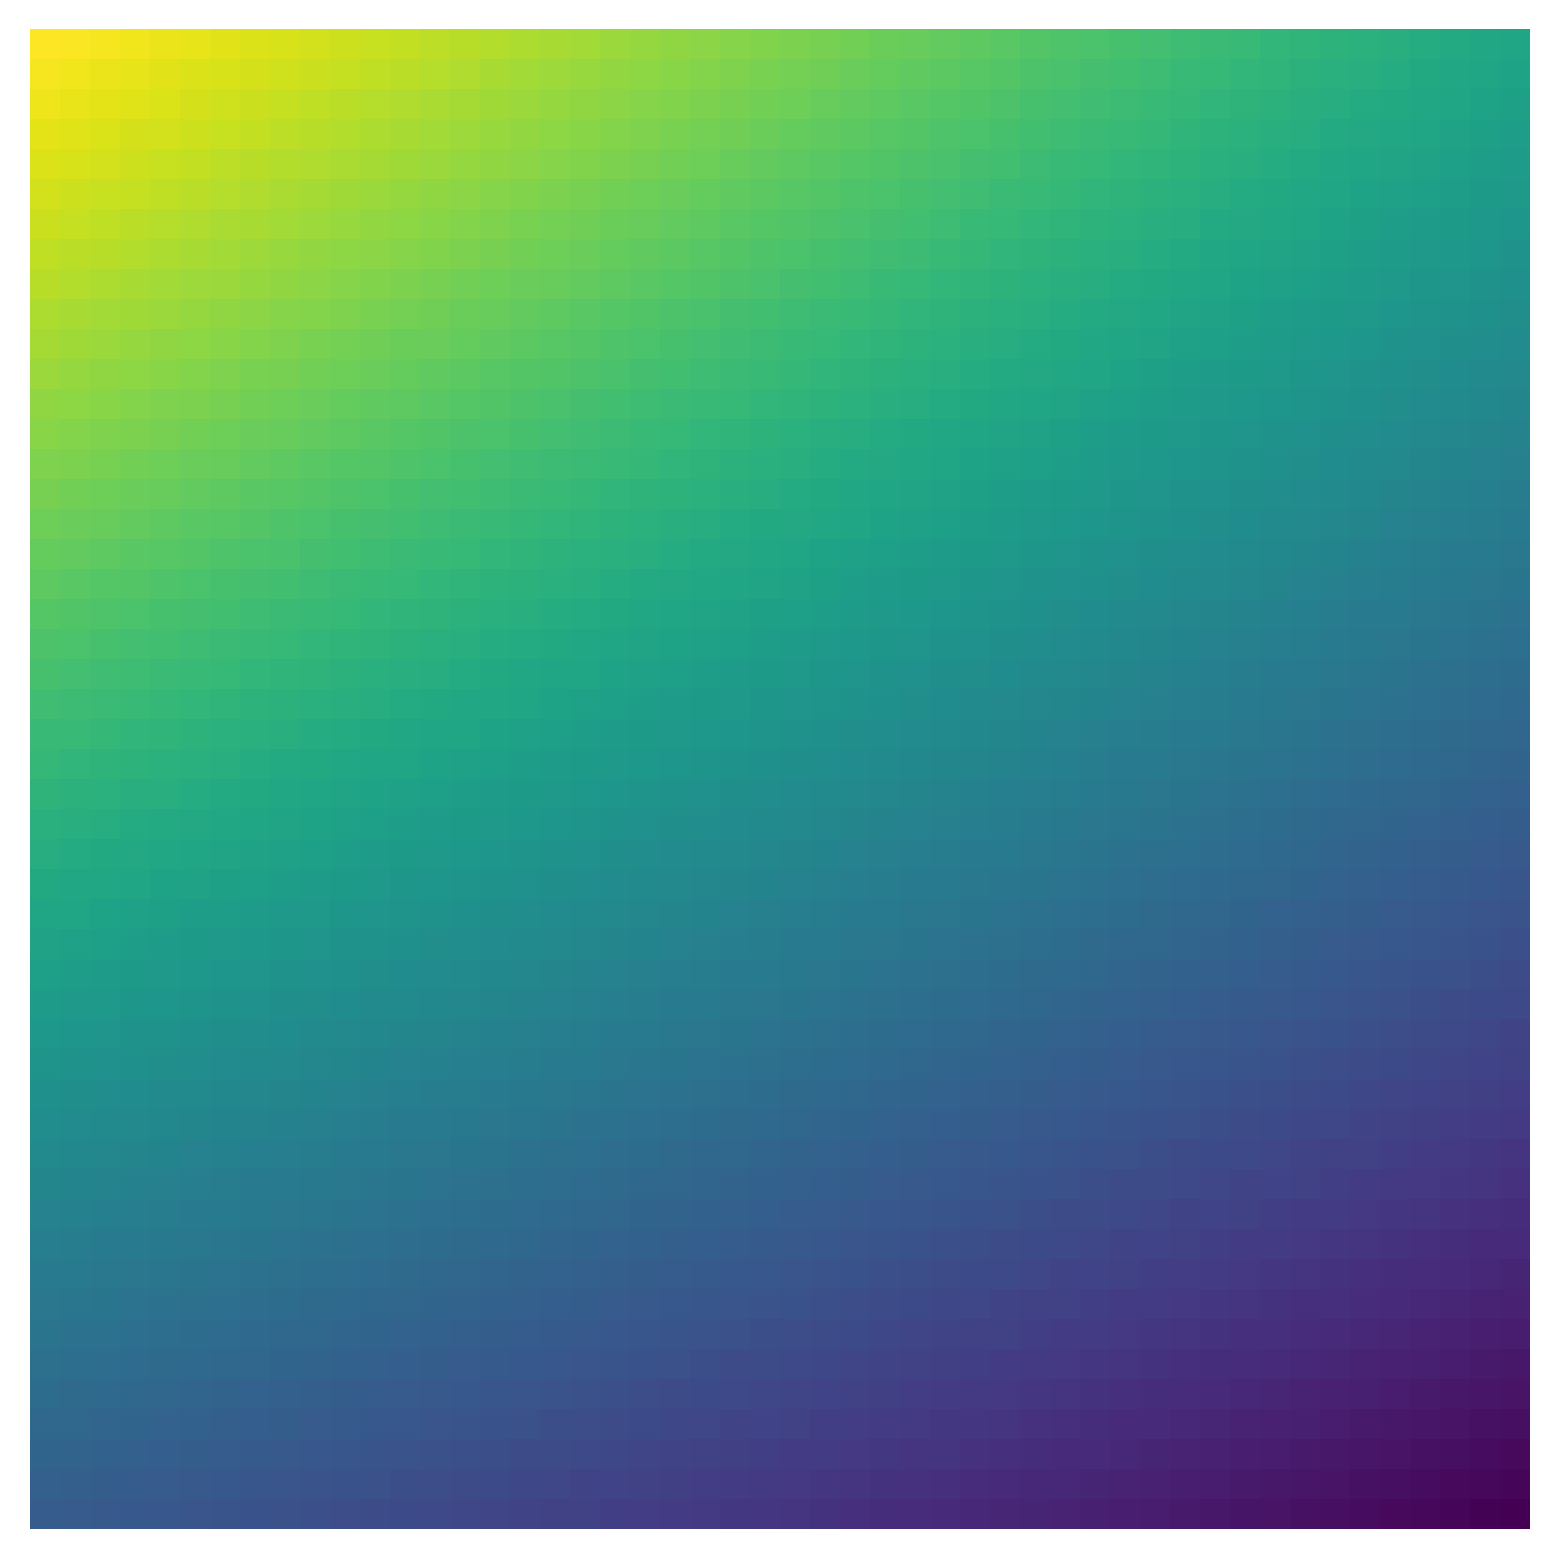

In [40]:
nn.visualize()

En cambio, ¿qué sucede con nuestra red neuronal profunda?

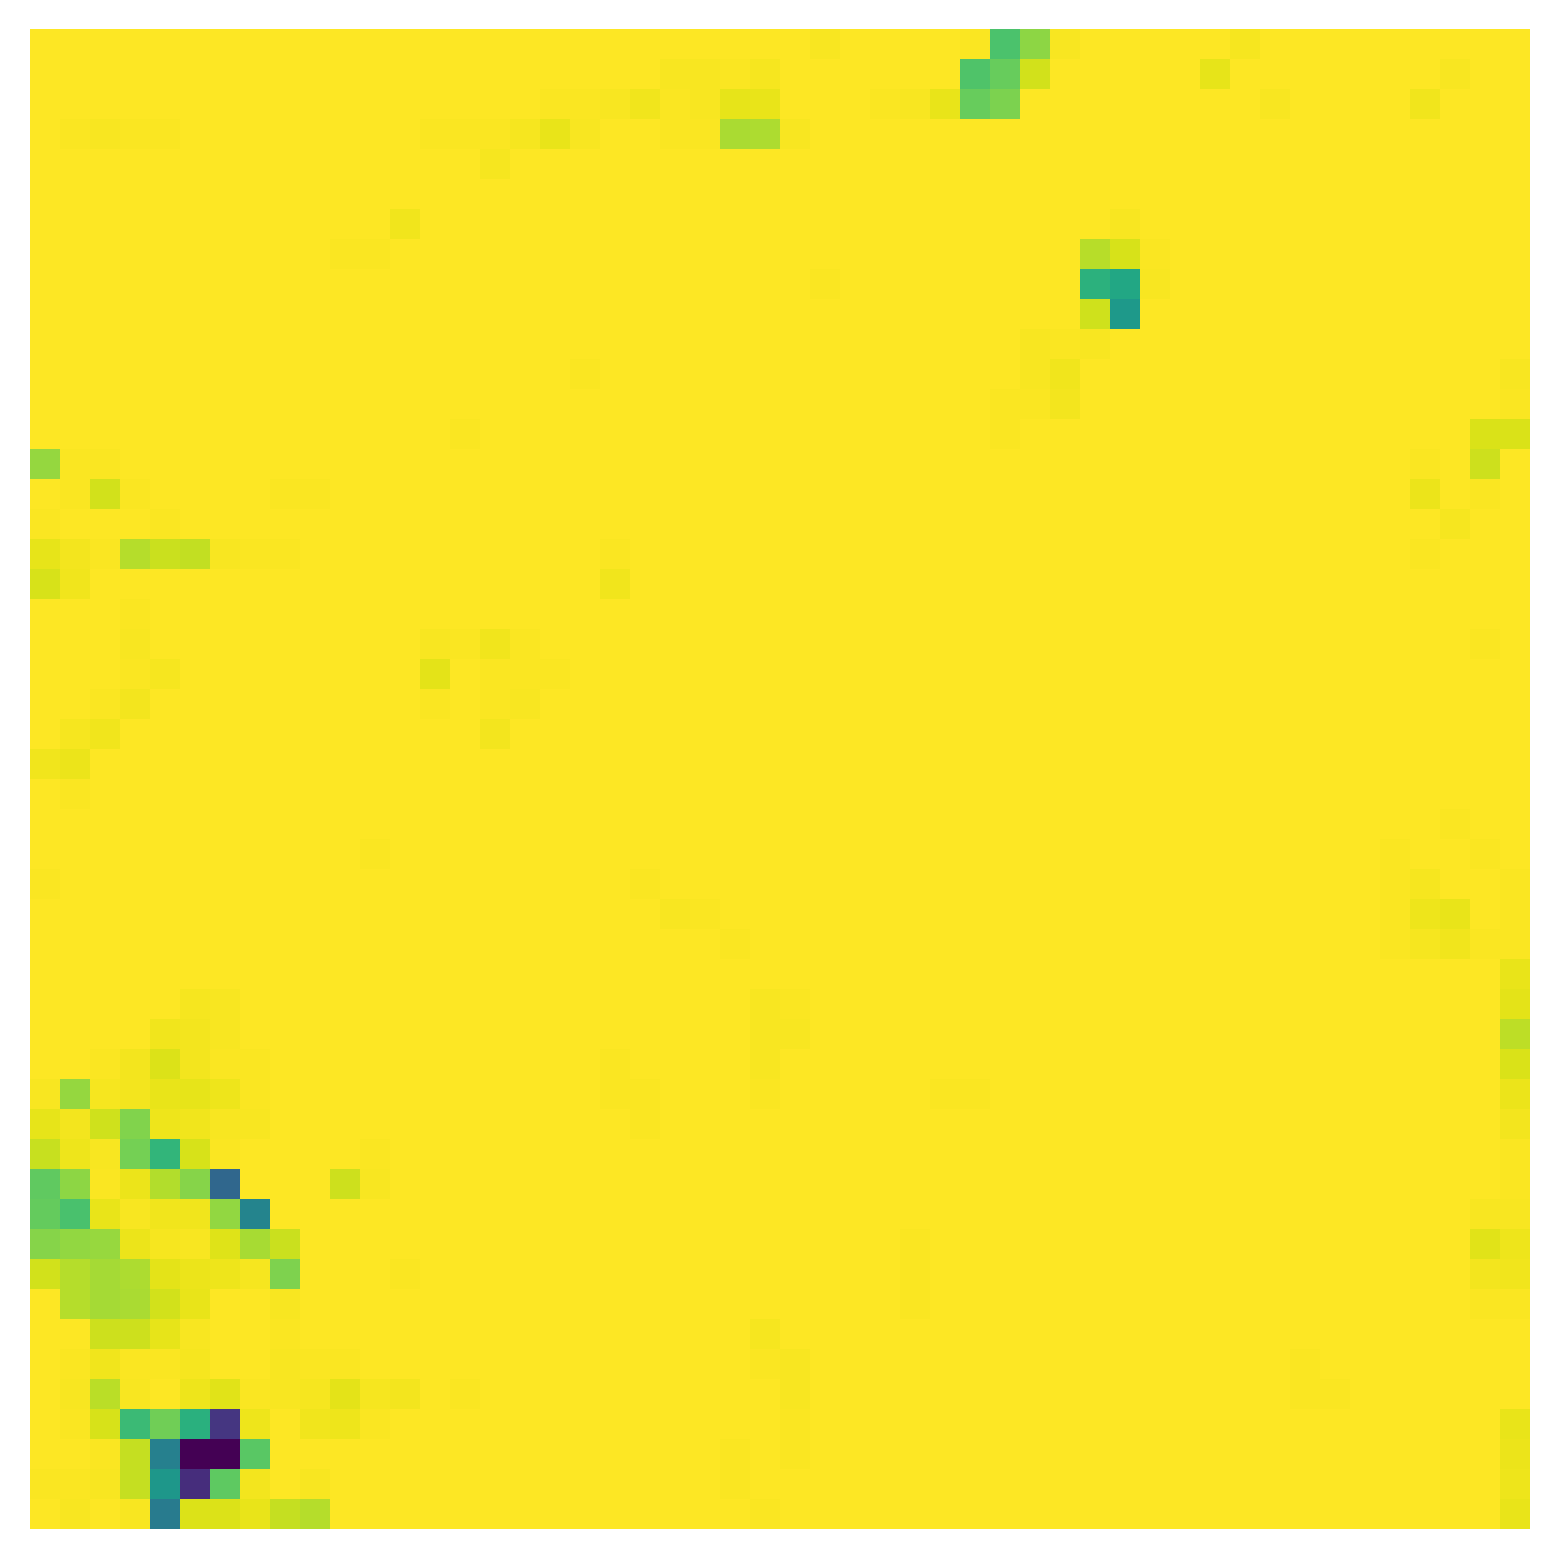

In [41]:
deep_nn.visualize()

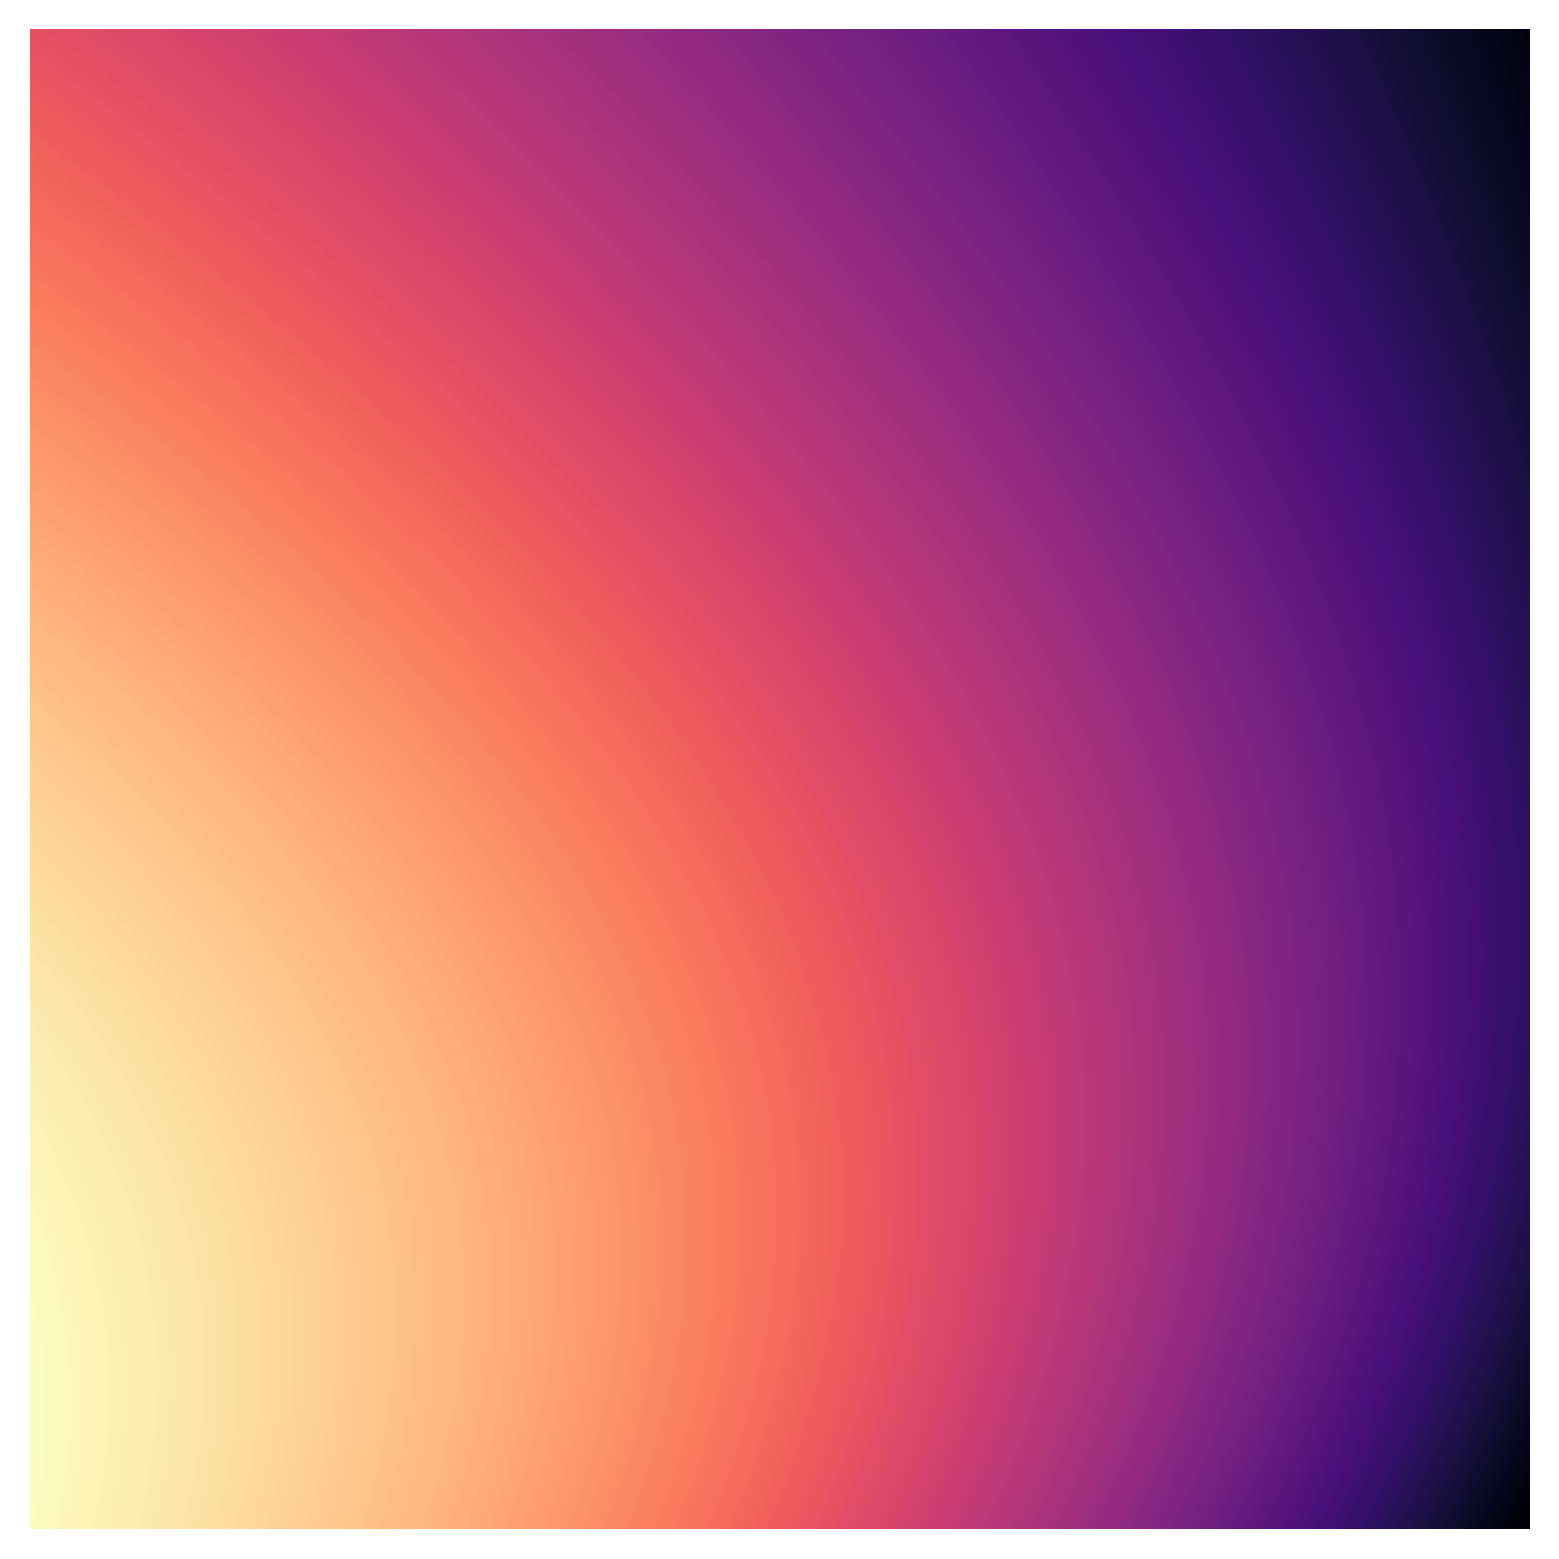

In [45]:
deep_nn.visualize(grid_size=512, colormap='magma', c_reverse=True)

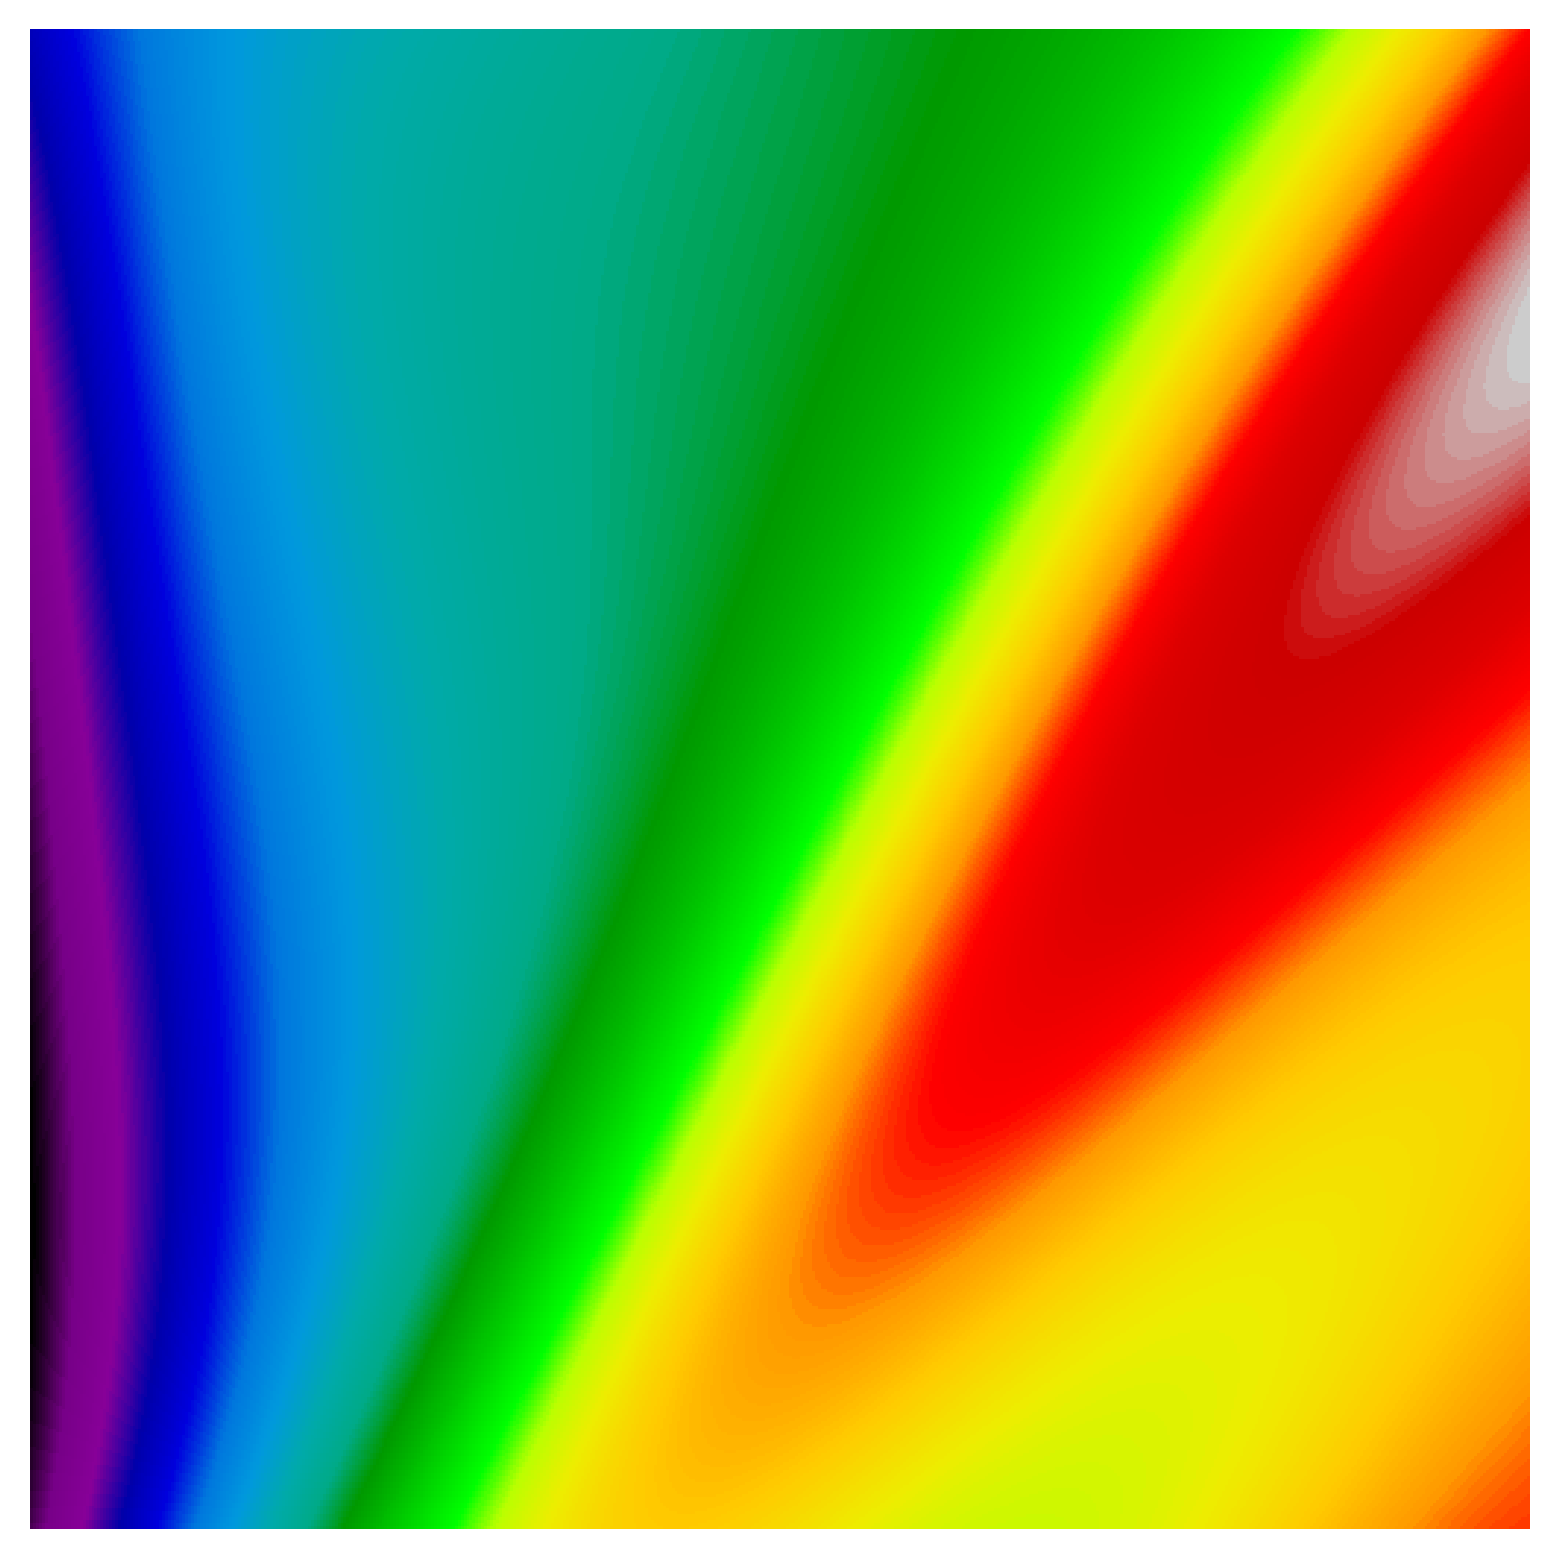

In [72]:
deep_nn.visualize(grid_size=512, colormap='nipy_spectral', c_reverse=True)

¿Esta imagen valida relaciones más profnudas?

### **Retos**

1. **Visualización en HD:**
   Al aumentar el tamaño de la grid de visualización, mejora la calidad de la imagen. A los 1024 píxeles se obtiene una imagen de bastante calidad. A los 2048 no funciona porque consumimos toda la RAM. Pude llegar a 1536 en 2:31 min y 1792 en 3:15 min. Ya con 1920 no funciona. A mayor número de capas, mayor tiempo de cálculo
2. **Implementar otras funciones de activación:** Utilización de las funciones tanh y su derivada
3. Visualizar capas intermedias.
4. **Explorar con variaciones de valores en los pesos:** Mientras los valores se los pesos sean más dispersos, menos uniforme será la imagen, es decir, se producen más puntos, se ve menos degradado

## **Comentarios extra**

- Sobre el aprendizaje
- Sobre la asignación de pesos
- Sobre aplicaciones reales
- ¿Más preguntas?